In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

For this lab I have provided a k-means implementation for you, as well as some sample code that uses the k-means implementation.  You will need to modify this code for your first exercise.  This code is adapted from https://github.com/madhug-nadig/Machine-Learning-Algorithms-from-Scratch/blob/master/K%20Means%20Clustering.py

In [2]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500, normalize=False):
    #k is the number of clusters.  We set two different stopping criteria a tolerence 
    #(if the centers move less than the tolerence the iterations stop)  and a maximum
    # number of iterations
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
        self.normalize=normalize

    def fit(self, data):

        self.centroids = {}

        #initialize the centroids, pick k points arbirarily from the available points
        for i in range(self.k):
            self.centroids[i] = data[np.random.randint(0,data.shape[0]-1)]
        

        #begin iterations
        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            #find the distance between the point and cluster; choose the nearest centroid, then add that point to the cluster
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            #average the cluster datapoints to re-calculate the centroids
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
            
            #normalize the new centroids
            if self.normalize==True:
                for centroid in self.centroids:
                    self.centroids[centroid]=self.centroids[centroid]/np.linalg.norm(self.centroids[centroid])

            
            isOptimal = True

            #check to see if the centroids have moved less than the tolerence
            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            #break out of the main loop if the results are optimal, ie. the centroids don't change their positions much(more than our tolerance)
            if isOptimal:
                break

#Initialize the KMeans object with three variables, k, tolerance, and max iterations

#fit:
#1. make k centroids and pick a random feature from the data for each one
#2. for each iteration:
#   initialize k empty classes
#   go through each feature and append it to the closest centroid's class
#   save our old centroids
#   average each class and update its centroid
#   if our new centroids are close to our old centroids, break
#   otherwise, iterate until you hit max iterations

Here is a worked example using the code above.

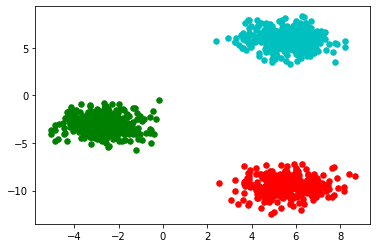

In [3]:
#example of using k-means class defined above

#create artifical data
X,Y= make_blobs(n_samples=1000, cluster_std=[1.0,1.0,1.0])

#initialize K-means class
km = K_Means(3)
#fit the data (in this case break into 3 clusters)
km.fit(X)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

# Plot the centroid centers
for centroid in km.centroids:
  plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

#plot the clusters (color, appropriately)
for classification in km.classes:
  color = colors[classification]
  for features in km.classes[classification]:
    plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()

In [4]:
data=np.load('earthquake_coordinates.npy')

#convert to spherical
for i in range(data.shape[0]):
    theta=np.deg2rad(data[i][0])
    phi=np.deg2rad(90-data[i][1])
    data[i]=[theta,phi]

#convert to euclidean
new_data=np.empty([data.shape[0],3])
for i in range(data.shape[0]):
    x=np.sin(data[i][1])*np.cos(data[i][0])
    y=np.sin(data[i][1])*np.sin(data[i][0])
    z=np.cos(data[i][1])
    new_data[i]=[x,y,z]

#run K means
km = K_Means(15,normalize=True)
km.fit(new_data)

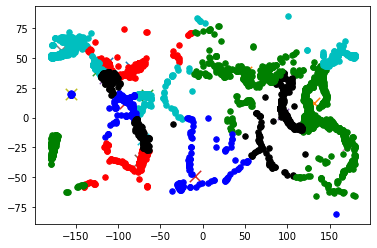

In [16]:
#convert centroids to longitude and latitude
centroids=[]
for centroid in km.centroids:
    x=km.centroids[centroid][0]
    y=km.centroids[centroid][1]
    z=km.centroids[centroid][2]
    theta=np.arctan2(y,x)
    phi=np.arccos(z)
    centroids.append([np.rad2deg(theta),90-np.rad2deg(phi)])
    
#convert classes to longitude and latitude
classes=[]
for classification in km.classes:
    this_class=[]
    for features in km.classes[classification]:
        x=features[0]
        y=features[1]
        z=features[2]
        theta=np.arctan2(y,x)
        phi=np.arccos(z)
        this_class.append([np.rad2deg(theta),90-np.rad2deg(phi)])
    classes.append(this_class)

# Plotting starts here
colors = 10*["r", "g", "c", "b", "k"]

# Plot the centroid centers
for centroid in centroids:
  plt.scatter(centroid[0], centroid[1], s = 130, marker = "x")

#plot the clusters (color, appropriately)
for i in range(len(classes)):
  color = colors[i]
  for features in classes[i]:
    plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()